   
<center>

# PROJEKT PRVE GODINE
## 2022./2023.
## Projekt - Predviđanje kvalitete vode
#### Marko Bonovil

</center>


**OPIS PROJEKTA:**
> Tvar koja prekriva više od polovice planeta Zemlje jedna je od esencijalnih tvari bez koje postojanje civilizacije ne bi bilo moguće. Sukladno tome se ovim radom nastoji pridonijeti očuvanju čistoće vode i njezine djelotvornosti na cjelokupni ekosustav. U tu svrhu primjenom algoritama strojnog učenja učinjen je značajan korak u procesu rane detekcije onečišćenja vode. Eksperiment opisan u radu obavljen je na dvama skupovima podataka primjenom modela slučajnih šuma, logističke regresije, stroja potpornih vektora i K-najbližih susjeda. Kao najdjelotvorniji algoritam iskazali su se slučajne šume koje su u oba slučaje pokazale izuzetne performanse utemeljene na evaluaciji korištenih modela.

#Biblioteke

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Učitavanje podataka

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/PPG

/content/drive/MyDrive/PPG


In [ ]:
dataframed = pd.read_csv('/content/drive/MyDrive/PPG/water_potability.csv')
dataframed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Skup podataka sastoji se od:
* 3276 redaka
* 10 stupaca

In [ ]:
print('Shape of the Dataset =', dataframed.shape)

Shape of the Dataset = (3276, 10)


# Podaci
**1. pH value:**
PH je važan parametar u procjeni acidobazne ravnoteže vode. Također je pokazatelj kiselog ili alkalnog stanja statusa vode. WHO je preporučio najveću dopuštenu granicu pH od 6,5 do 8,5. Trenutačni rasponi istraživanja bili su 6,52–6,83 što je u rasponu standarda SZO.

**2. Hardness:**
Tvrdoću uglavnom uzrokuju soli kalcija i magnezija. Ove soli su otopljene iz geoloških naslaga kroz koje voda putuje. Duljina vremena u kojem je voda u kontaktu s materijalom koji stvara tvrdoću pomaže odrediti koliko je tvrdoće sirove vode. Tvrdoća je izvorno definirana kao sposobnost vode da taloži sapun uzrokovan kalcijem i magnezijem.

**3. Solids (Total dissolved solids - TDS):**
Voda ima sposobnost otapati širok raspon anorganskih i nekih organskih minerala ili soli kao što su kalij, kalcij, natrij, bikarbonati, kloridi, magnezij, sulfati itd. Ti minerali stvaraju neželjeni okus i razrijeđenu boju u izgledu vode. Ovo je važan parametar za korištenje vode. Voda s visokom TDS vrijednošću ukazuje da je voda visoko mineralizirana. Poželjna granica za TDS je 500 mg/l, a najveća granica je 1000 mg/l koja je propisana za potrebe pića.

**4. Chloramines:**
Klor i kloramin su glavni dezinficijensi koji se koriste u javnim vodovodnim sustavima. Kloramini se najčešće stvaraju kada se amonijak doda kloru za obradu vode za piće. Razine klora do 4 miligrama po litri (mg/L ili 4 dijela na milijun (ppm)) smatraju se sigurnima u vodi za piće.

**5. Sulfate:**
Sulfati su prirodne tvari koje se nalaze u mineralima, tlu i stijenama. Prisutni su u okolnom zraku, podzemnim vodama, biljkama i hrani. Glavna komercijalna upotreba sulfata je u kemijskoj industriji. Koncentracija sulfata u morskoj vodi je oko 2700 miligrama po litri (mg/L). Kreće se od 3 do 30 mg/L u većini slatkovodnih zaliha, iako se na nekim geografskim lokacijama nalaze puno veće koncentracije (1000 mg/L).

**6. Conductivity:**
Čista voda nije dobar vodič električne struje, već je dobar izolator. Povećanje koncentracije iona povećava električnu vodljivost vode. Općenito, količina otopljenih krutih tvari u vodi određuje električnu vodljivost. Električna vodljivost (EC) zapravo mjeri ionski proces otopine koji joj omogućuje prijenos struje. Prema standardima SZO, EC vrijednost ne bi smjela prelaziti 400 μS/cm.

**7. Organic_carbon:**
Ukupni organski ugljik (TOC) u izvorskim vodama dolazi iz raspadajuće prirodne organske tvari (NOM), kao i iz sintetičkih izvora. TOC je mjera ukupne količine ugljika u organskim spojevima u čistoj vodi. Prema US EPA < 2 mg/L kao TOC u tretiranoj/pitkoj vodi i < 4 mg/L u izvorskoj vodi koja se koristi za tretman.

**8. Trihalomethanes:**
THM su kemikalije koje se mogu naći u vodi tretiranoj klorom. Koncentracija THM-a u vodi za piće varira ovisno o razini organskog materijala u vodi, količini klora potrebnoj za obradu vode i temperaturi vode koja se tretira. Razina THM do 80 ppm smatra se sigurnom u vodi za piće.

**9. Turbidity:**
Zamućenost vode ovisi o količini krute tvari prisutne u suspendiranom stanju. To je mjera svojstava emitiranja svjetlosti vode, a test se koristi za označavanje kvalitete ispuštanja otpada s obzirom na koloidnu tvar. Srednja vrijednost zamućenosti dobivena za Wondo Genet Campus (0,98 NTU) niža je od preporučene vrijednosti SZO od 5,00 NTU.

**10. Potability:**
Označava je li voda sigurna za ljudsku potrošnju, pri čemu 1 znači da je pitka, a 0 da nije pitka.

# Osnovne informacije o podacima

In [ ]:
dataframed.columns.values.tolist()

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
dataframed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
dataframed.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
dataframed.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [ ]:
dataframed.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Nedostajuće vrijednosti:
Može se primjetiti da nedostajuće vrijednosti odnosno Nan vrijednosti sadržane su u stupcima: ph, Sulfate i Trihalomethanes.

# Nedostajuće vrijednosti: ph

In [ ]:
print('Uvjetne izjave za popunjavanje vrijednosti koje nedostaju u stupcu PH vrijednosti')

print("\n")
print('if Potability = 0 and Hardness <= 150')
condition_1_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_1_mean_ph)))

print("\n")
print('if Potability = 0 and Hardness > 150')
condition_2_mean_ph = dataframed[(dataframed['Potability'] == 0) & (dataframed['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_2_mean_ph)))


print("\n")
print('if Potability = 1 and Hardness <= 150')
condition_3_mean_ph = dataframed[(dataframed['Potability'] == 1) & (dataframed['Hardness'] <= 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_3_mean_ph)))

print("\n")
print('if Potability = 1 and Hardness > 150')
condition_4_mean_ph = dataframed[(dataframed['Potability'] == 1) & (dataframed['Hardness'] > 150)][['ph']].mean()
print("PH VALUE : {:.4f}".format(float(condition_4_mean_ph)))

Uvjetne izjave za popunjavanje vrijednosti koje nedostaju u stupcu PH vrijednosti


if Potability = 0 and Hardness <= 150
PH VALUE : 6.7220


if Potability = 0 and Hardness > 150
PH VALUE : 7.1125


if Potability = 1 and Hardness <= 150
PH VALUE : 7.0982


if Potability = 1 and Hardness > 150
PH VALUE : 7.0714


In [ ]:
for x in range(0, len(dataframed)) :
    if (pd.isnull(dataframed['ph'][x]) == True) :
        if ((dataframed['Potability'][x] == 0) & (dataframed['Hardness'][x] <= 150)) : dataframed['ph'][x] = condition_1_mean_ph
        elif ((dataframed['Potability'][x] == 0) & (dataframed['Hardness'][x] > 150)) : dataframed['ph'][x] = condition_2_mean_ph
        elif ((dataframed['Potability'][x] == 1) & (dataframed['Hardness'][x] <= 150)) : dataframed['ph'][x] = condition_3_mean_ph
        elif ((dataframed['Potability'][x] == 1) & (dataframed['Hardness'][x] > 150)) : dataframed['ph'][x] = condition_4_mean_ph

<ipython-input-79-c0a52ab39aba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif ((dataframed['Potability'][x] == 0) & (dataframed['Hardness'][x] > 150)) : dataframed['ph'][x] = condition_2_mean_ph
<ipython-input-79-c0a52ab39aba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if ((dataframed['Potability'][x] == 0) & (dataframed['Hardness'][x] <= 150)) : dataframed['ph'][x] = condition_1_mean_ph
<ipython-input-79-c0a52ab39aba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

# Nedostajuće vrijednosti : Sulfate

Morska voda sadrži otprilike 2700 miligrama po litri (mg/L) sulfata. Većina zaliha slatke vode ima koncentracije od 3 do 30 mg/L, dok neka zemljopisna područja imaju znatno veće količine (1000 mg/L).

Napomena: Nažalost, skup podataka sadrži samo podatke o sulfatu u rasponu od 129 do 481 (mg/L), tako da ćemo samo dobiti srednju vrijednost redaka koji su pitki i nepitki, što ima razliku od 2 (mg/L)

In [ ]:
print('Uvjetne izjave za popunjavanje nedostajućih vrijednosti stupca sulfata')

print("\n")
print('if Potability = 0')
condition_1_mean_sulfate = dataframed[(dataframed['Potability'] == 0)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_1_mean_sulfate)))

print("\n")
print('if Potability = 1')
condition_2_mean_sulfate = dataframed[(dataframed['Potability'] == 1)][['Sulfate']].mean()
print("Sulfate : {:.4f}".format(float(condition_2_mean_sulfate)))

Uvjetne izjave za popunjavanje nedostajućih vrijednosti stupca sulfata


if Potability = 0
Sulfate : 334.5643


if Potability = 1
Sulfate : 332.5670


In [ ]:
for x in range(0, len(dataframed)) :
    if (pd.isnull(dataframed['Sulfate'][x]) == True) :
        if (dataframed['Potability'][x] == 0) : dataframed['Sulfate'][x] = condition_1_mean_sulfate
        else : dataframed['Sulfate'][x] = condition_2_mean_sulfate


<ipython-input-81-1e55f1f147fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (dataframed['Potability'][x] == 0) : dataframed['Sulfate'][x] = condition_1_mean_sulfate
<ipython-input-81-1e55f1f147fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : dataframed['Sulfate'][x] = condition_2_mean_sulfate


# Nedostajuće vrijednosti : Trihalomethanes

THM su kemikalije koje se mogu naći u vodi tretiranoj klorom. Koncentracija THM-a u vodi za piće varira ovisno o razini organskog materijala u vodi, količini klora potrebnoj za obradu vode i temperaturi vode koja se tretira. Razina THM do 80 ppm smatra se sigurnom u vodi za piće.

In [ ]:
dataframed['Trihalomethanes'].fillna(value = dataframed['Trihalomethanes'].mean() , inplace = True)

# Eksplorativna analiza podataka (EDA)

Raspon vrijednosti za svaki stupac u skupu podataka gdje je prikazana minimalna vrijednost i maksimalna vrijednost određenog kemijskog spoja

In [ ]:
print("Raspon vrijednosti u stupcima")

print("Ph : {:.4f}".format(min(dataframed['ph'])) + " - {:.4f}".format(max(dataframed['ph'])))
print('\n')
print("Hardness : {:.4f}".format(min(dataframed['Hardness'])) + " - {:.4f}".format(max(dataframed['Hardness'])))
print('\n')
print("Solids : {:.4f}".format(min(dataframed['Solids'])) + " - {:.4f}".format(max(dataframed['Solids'])))
print('\n')
print("Chloramines : {:.4f}".format(min(dataframed['Chloramines'])) + " - {:.4f}".format(max(dataframed['Chloramines'])))
print('\n')
print("Sulfate : {:.4f}".format(min(dataframed['Sulfate'])) + " - {:.4f}".format(max(dataframed['Sulfate'])))
print('\n')
print("Conductivity : {:.4f}".format(min(dataframed['Conductivity'])) + " - {:.4f}".format(max(dataframed['Conductivity'])))
print('\n')
print("Organic Carbon : {:.4f}".format(min(dataframed['Organic_carbon'])) + " - {:.4f}".format(max(dataframed['Organic_carbon'])))
print('\n')
print("Trihalomethanes : {:.4f}".format(min(dataframed['Trihalomethanes'])) + " - {:.4f}".format(max(dataframed['Trihalomethanes'])))
print('\n')
print("Turbidity : {:.4f}".format(min(dataframed['Turbidity'])) + " - {:.4f}".format(max(dataframed['Turbidity'])))
print('\n')
print("Potability : {:.4f}".format(min(dataframed['Potability'])) + " - {:.4f}".format(max(dataframed['Potability'])))

Raspon vrijednosti u stupcima
Ph : 0.0000 - 14.0000


Hardness : 47.4320 - 323.1240


Solids : 320.9426 - 61227.1960


Chloramines : 0.3520 - 13.1270


Sulfate : 129.0000 - 481.0306


Conductivity : 181.4838 - 753.3426


Organic Carbon : 2.2000 - 28.3000


Trihalomethanes : 0.7380 - 124.0000


Turbidity : 1.4500 - 6.7390


Potability : 0.0000 - 1.0000


# Distribucija vrijednosti po stupcima

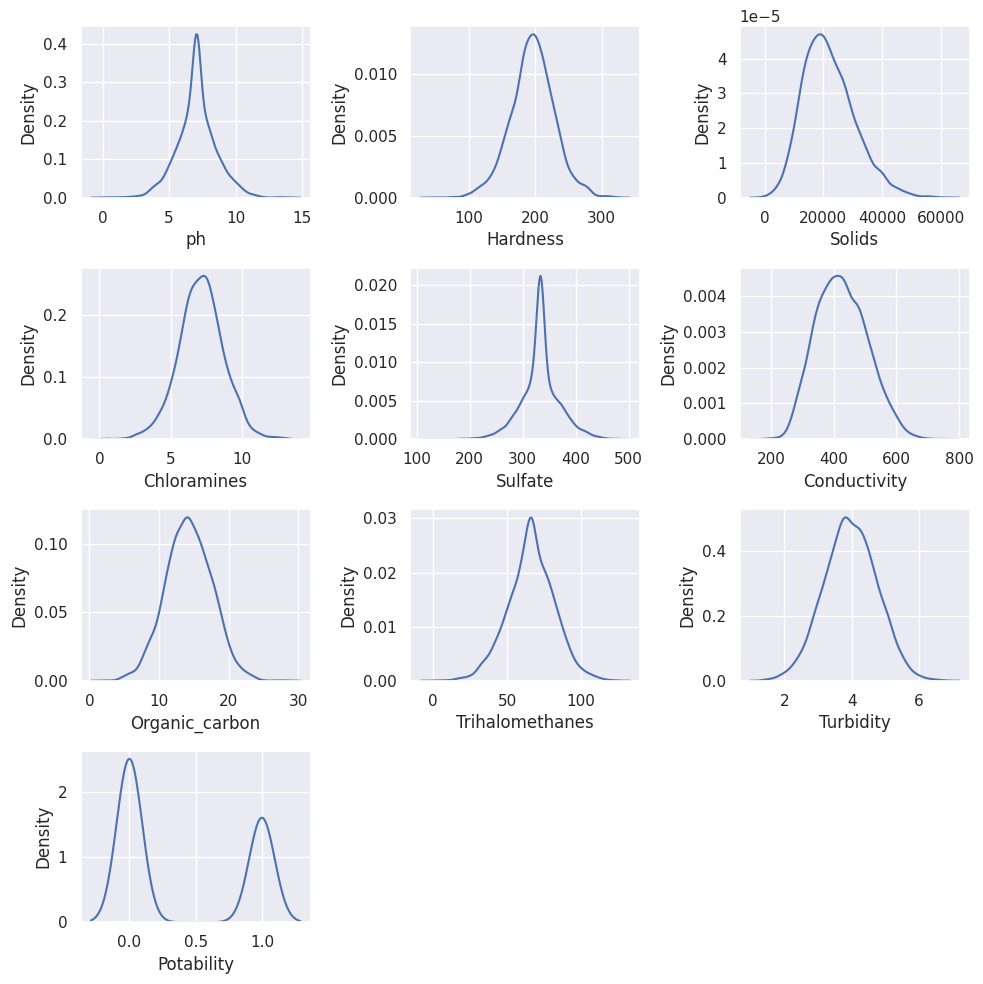

In [ ]:
plt.figure(figsize=(10,10))
for i,col in enumerate(dataframed.columns):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=dataframed[col])
    plt.tight_layout()

# Matrica korelacije

Koristimo [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) kako bismo dobili matricu korelacija među varijablama.Parametar method se odnosi na vrstu koeficijenta korelacije koji se koristi pri izračunu. Moguće je odabrati između 'pearson', 'spearman' ili 'kendall'. U ovom slučaju koristit ćemo person kojim provjeravamo jačinu linearne veze među varijablama.

Broj corr(X,Y) je uvijek između [-1,1]. U slučaju corr(X,Y)=+/- 1 varijable su linearno zavisne, a ako je corr(X,Y)=0 u tom slučaju kažemo da su X i Y nekorelirane.

[Text(0.5, 56.016874999999985, 'Matrica korelacije')]

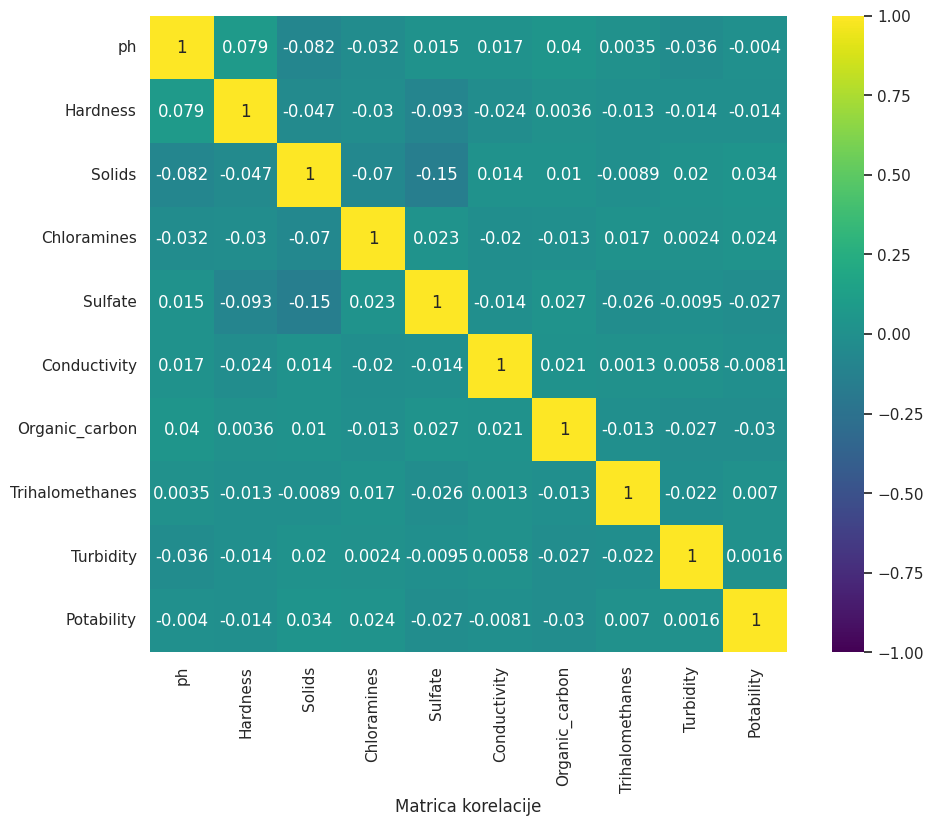

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
Heated = sns.heatmap(dataframed.corr("pearson"),vmin=-1, vmax=1,cmap='viridis',annot=True, square=True)
Heated.set(xlabel = "Matrica korelacije")

In [ ]:
sns.pairplot(dataframed,hue='Potability')

Output hidden; open in https://colab.research.google.com to view.

# Provjera postoje li ekstremne vrijednosti u skupu podataka

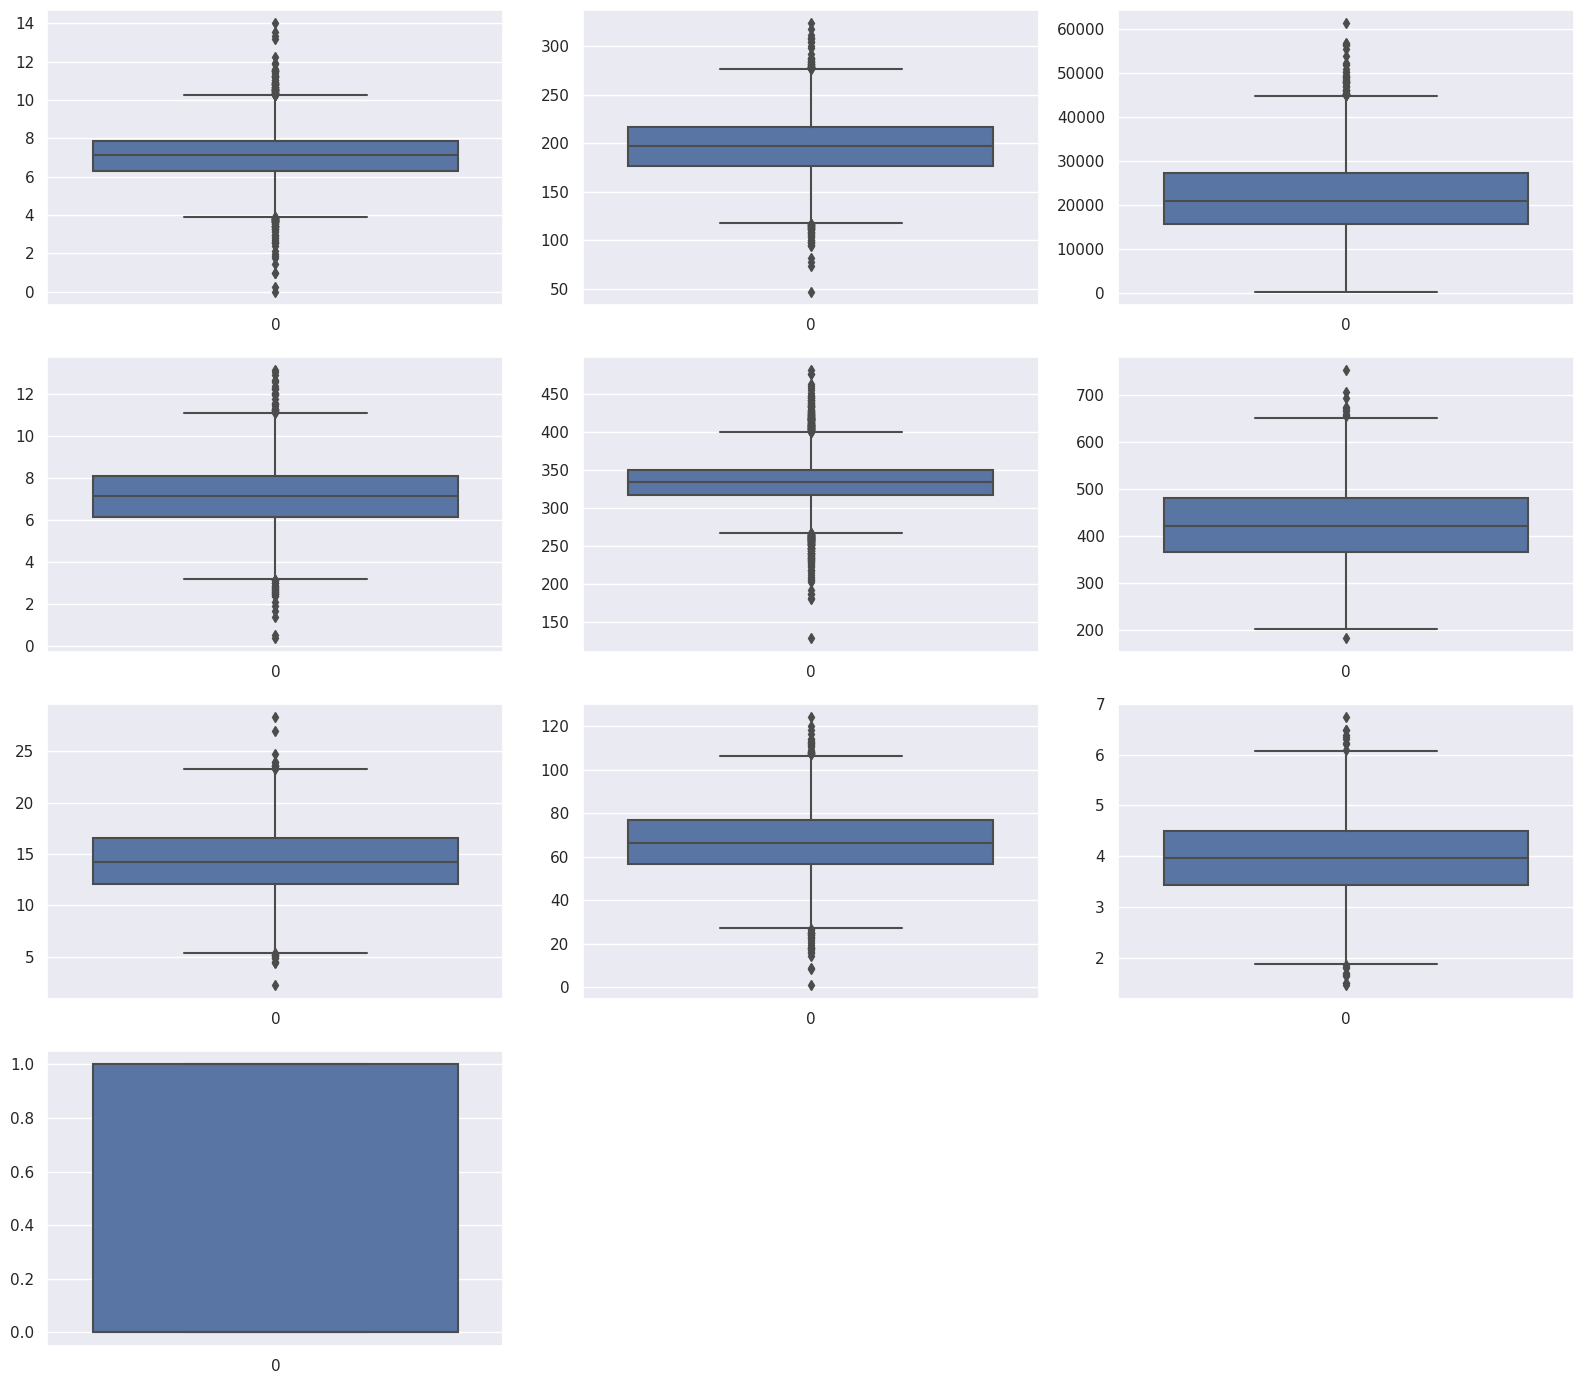

In [ ]:
plt.figure(figsize=(16,14))
for i,col in enumerate(dataframed.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=dataframed[col])

    plt.tight_layout()

# Stupac : PH

# Distribucija vrijednosti za stupac PH

[(0.0, 14.0)]

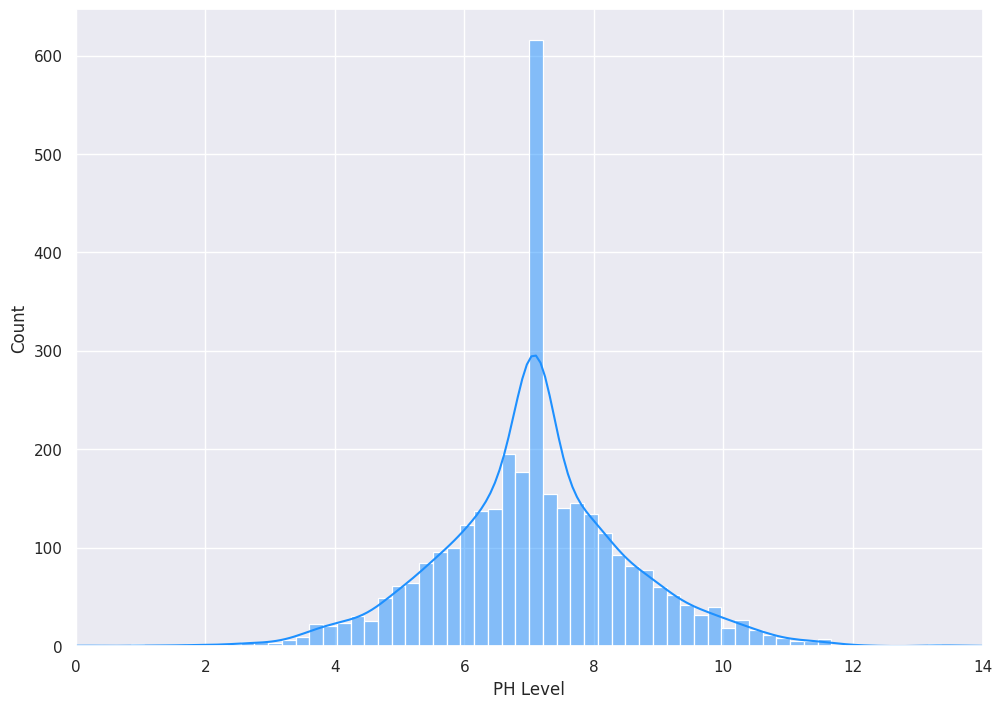

In [ ]:
count_plotted = sns.histplot(x = 'ph', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "PH Level")
count_plotted.set(xlim = (0.0000, 14.0000))

# Koliko je ekstremnih vrijednosti sadržano u stupcu PH

In [ ]:
numpy_array = np.array(dataframed['ph'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su one koje su: manje od {:.4f}".format(lower_bound), "ili veće od {:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), " ekstremnih vrijednosti.")

Ekstremne vrijednosti su one koje su: manje od 3.8891 ili veće od 10.2586
Postoji 142  ekstremnih vrijednosti.


# Stupac : Hardness

# Distribucija vrijednosti za stupac Hardness

[(47.432, 323.124)]

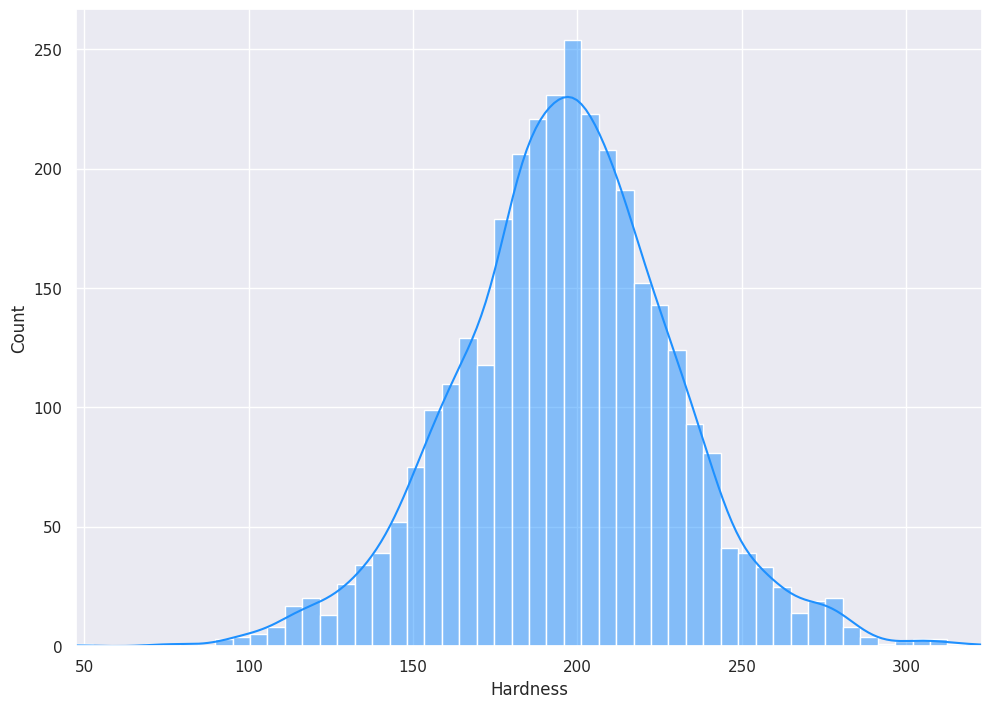

In [ ]:
count_plotted = sns.histplot(x = 'Hardness', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Hardness")
count_plotted.set(xlim = (47.4320, 323.1240))

# Koliko ekstremnih vrijednosti postoji u stupcu Hardness?

In [ ]:
numpy_array = np.array(dataframed['Hardness'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su one koje su: manje od {:.4f}".format(lower_bound), "ili veće od{:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), "ekstremnih vrijednosti.")

Ekstremne vrijednosti su one koje su: manje od 117.1252 ili veće od276.3928
Postoji 83 ekstremnih vrijednosti.


# Stupac : Solids (Total dissolved solids - TDS)

# Distribucija vrijednosti za stupac Solids

[(320.9426, 61227.196)]

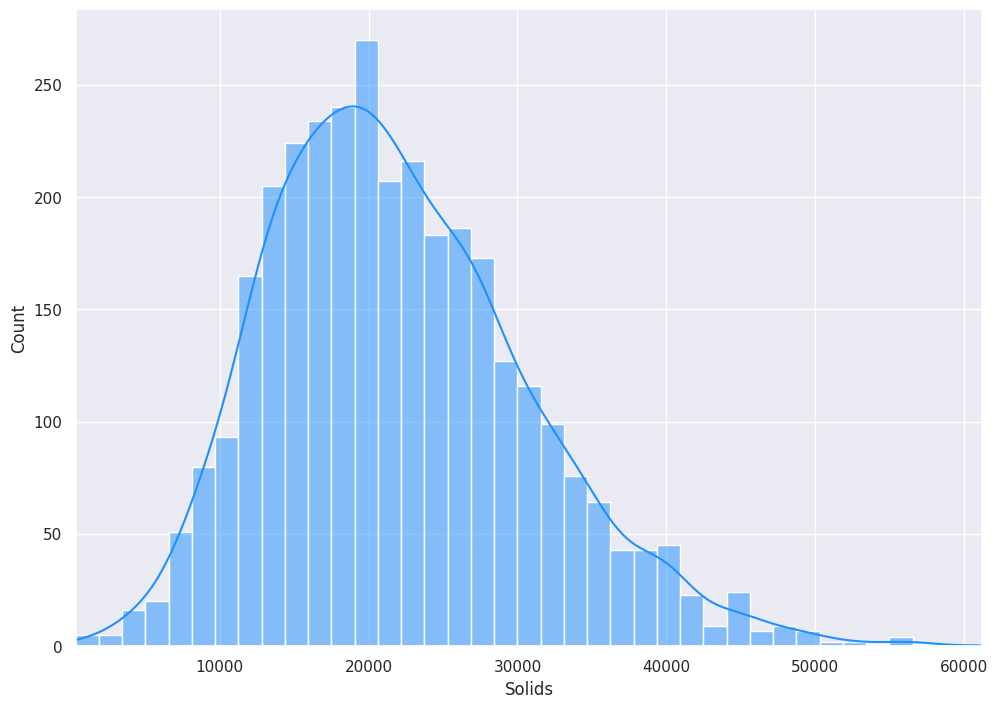

In [ ]:
count_plotted = sns.histplot(x = 'Solids', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Solids")
count_plotted.set(xlim = (320.9426, 61227.1960))

#Koliko ekstremnih vrijednosti postoji u stupcu Solids?

In [ ]:
numpy_array = np.array(dataframed['Solids'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su veće od {:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), "ekstremnih vrijednosti.")

Ekstremne vrijednosti su veće od 44831.8699
Postoji 47 ekstremnih vrijednosti.


# Stupac : Chloramines

# Distribucija vrijednosti za stupac Chloramines

[(0.352, 13.127)]

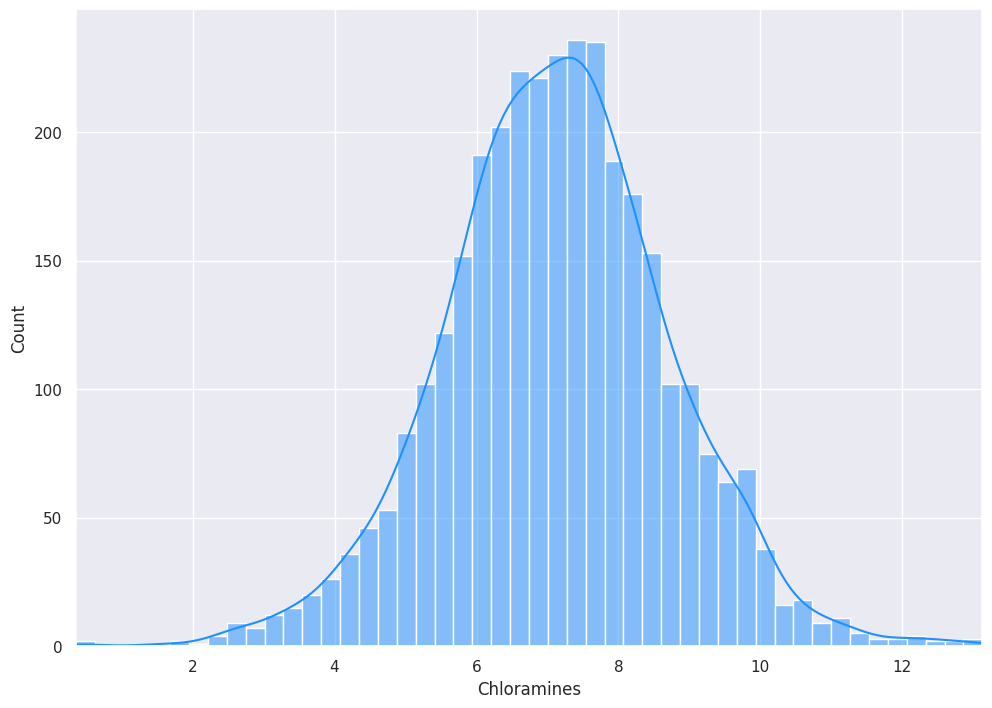

In [ ]:
count_plotted = sns.histplot(x = 'Chloramines', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Chloramines")
count_plotted.set(xlim = (0.3520, 13.1270))

#Koliko ekstremnih vrijednosti postoji u stupcu Chloramines?

In [ ]:
numpy_array = np.array(dataframed['Chloramines'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su one koje su: manje od {:.4f}".format(lower_bound), "ili veće od {:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), "ekstremnih vrijednosti.")

Ekstremne vrijednosti su one koje su: manje od 3.1462 ili veće od 11.0961
Postoji 61 ekstremnih vrijednosti.


# Stupac : Sulfate

# Distribucija vrijednosti za stupac Sulfate

[(129.0, 481.0306)]

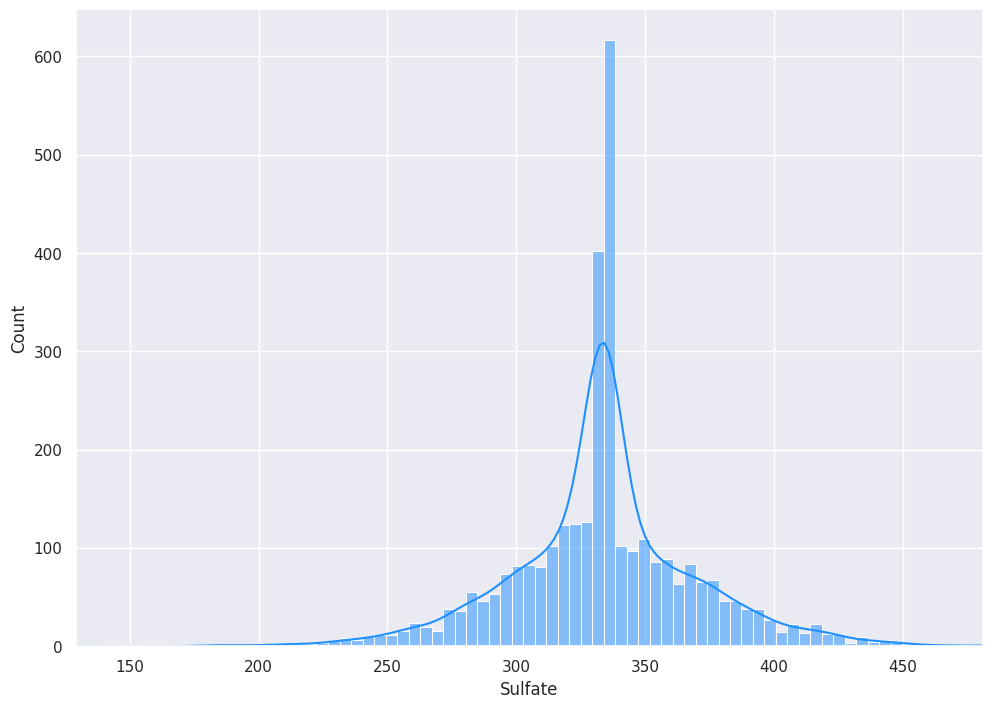

In [ ]:
count_plotted = sns.histplot(x = 'Sulfate', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Sulfate")
count_plotted.set(xlim = (129.0000, 481.0306))

# Koliko ekstremnih vrijednosti postoji u stupcu Sulfate?

In [ ]:
numpy_array = np.array(dataframed['Sulfate'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su one koje su: manje od {:.4f}".format(lower_bound), "ili veće od {:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), "ekstremnih vrijednosti.")

Ekstremne vrijednosti su one koje su: manje od 267.1580 ili veće od 400.3224
Postoji 264 ekstremnih vrijednosti.


# Stupac : Conductivity

# Distribucija vrijednosti za stupac Conductivity

[(181.4838, 753.3426)]

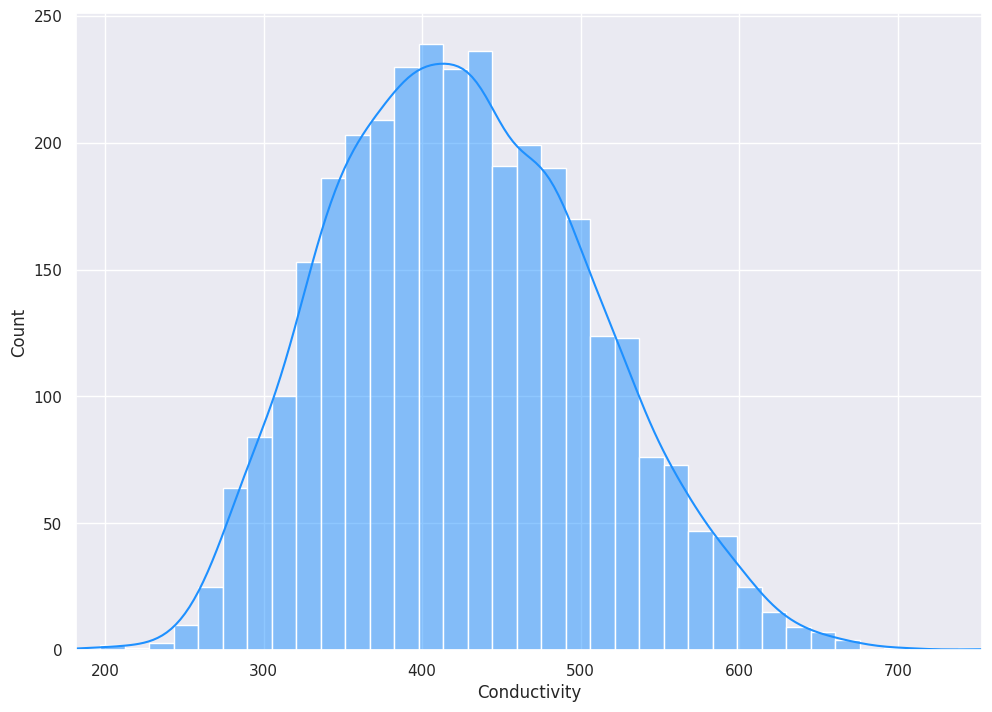

In [ ]:
count_plotted = sns.histplot(x = 'Conductivity', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Conductivity")
count_plotted.set(xlim = (181.4838, 753.3426))

# Koliko ekstremnih vrijednosti postoji u stupcu Conductivity?

In [ ]:
numpy_array = np.array(dataframed['Conductivity'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su one koje su: manje od {:.4f}".format(lower_bound), "ili veće od {:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), "ekstremnih vrijednosti.")

Ekstremne vrijednosti su one koje su: manje od 191.6476 ili veće od 655.8791
Postoji 11 ekstremnih vrijednosti.


# Stupac : Organic Carbon

# Distribucija vrijednosti za stupac Organic Carbon

[(-26.1, 29.60500000000001)]

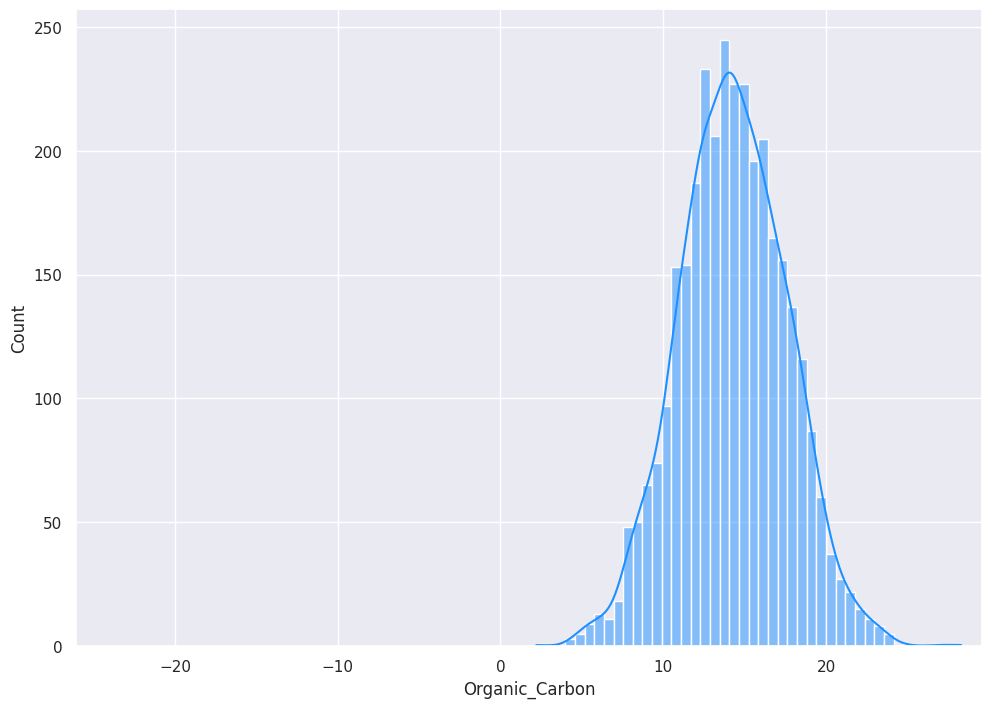

In [ ]:
count_plotted = sns.histplot(x = 'Organic_carbon', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Organic_Carbon")
count_plotted.set(xlim = (2.2000 - 28.3000))

# Koliko ekstremnih vrijednosti postoji u stupcu Ogranic Carbon?

In [ ]:
numpy_array = np.array(dataframed['Organic_carbon'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su one koje su: manje od {:.4f}".format(lower_bound), "ili veće od{:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), "ekstremnih vrijednosti.")

Ekstremne vrijednosti su one koje su: manje od 5.3280 ili veće od23.2954
Postoji 25 ekstremnih vrijednosti.


# Stupac : Trihalomethanes

# Distribucija vrijednosti za stupac Trihalomethanes

[(-123.262, 130.1631)]

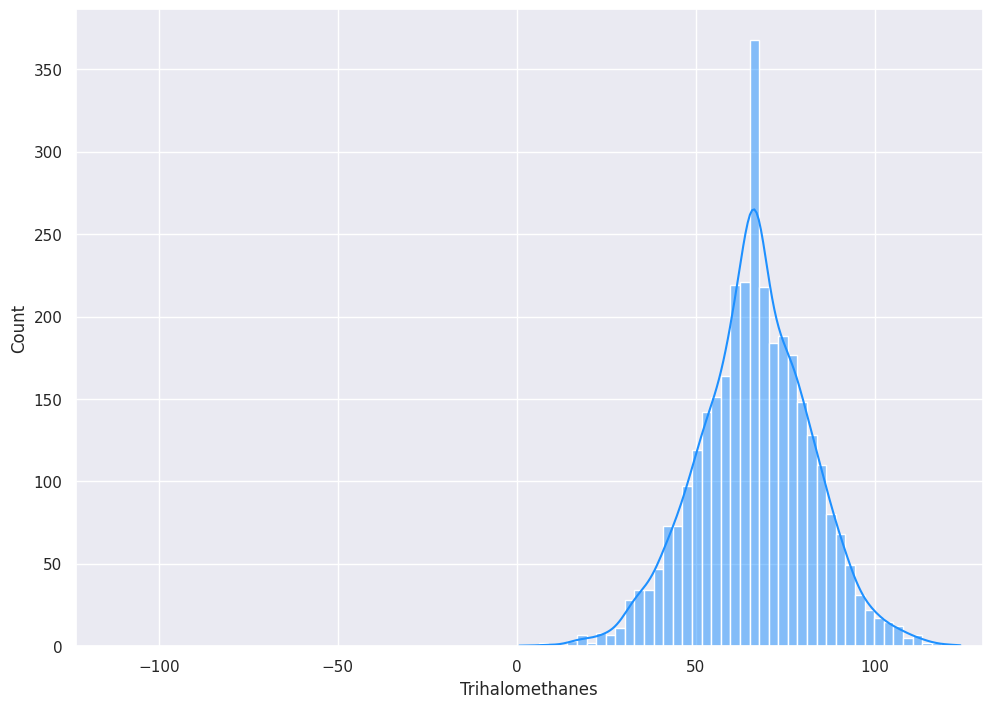

In [ ]:
count_plotted = sns.histplot(x = 'Trihalomethanes', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Trihalomethanes")
count_plotted.set(xlim = (0.7380 - 124.0000))

#Koliko ekstremnih vrijednosti postoji u stupcu Trihalomethanes?

In [ ]:
numpy_array = np.array(dataframed['Trihalomethanes'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su one koje su: manje od  {:.4f}".format(lower_bound), "ili veće od {:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), "ekstremnih vrijednosti.")

Ekstremne vrijednosti su one koje su: manje od  26.6192 ili veće od 106.6950
Postoji 54 ekstremnih vrijednosti.


# Stupac : Turbidity

# Distribucija vrijednosti iz stupca Turbidity

[(-5.289, 7.00345)]

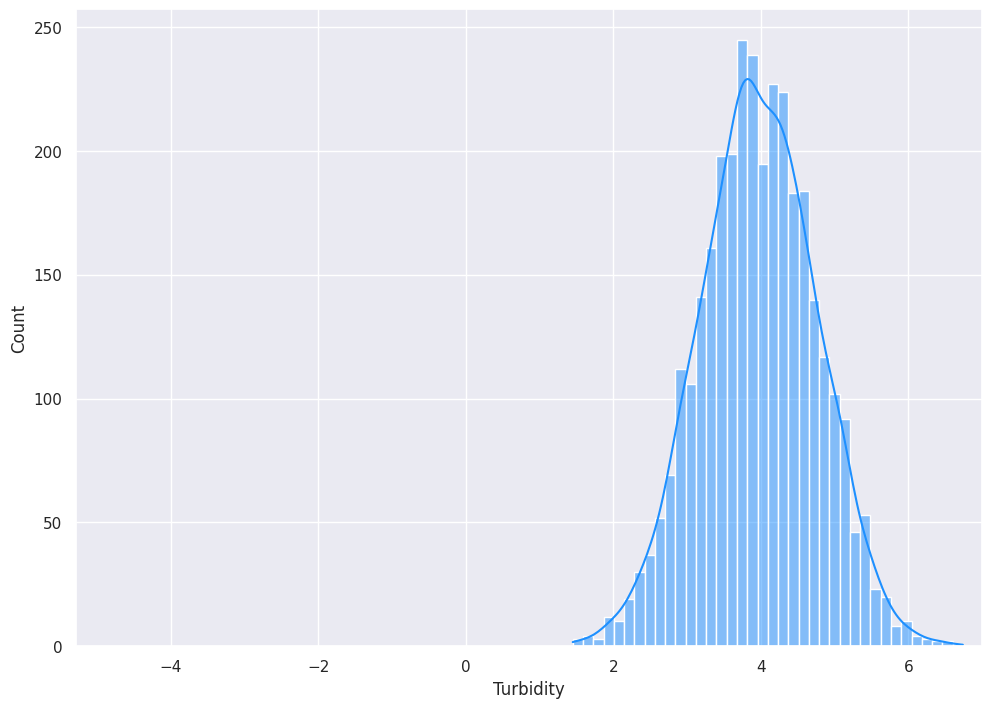

In [ ]:
count_plotted = sns.histplot(x = 'Turbidity', data = dataframed, kde = True, color = 'dodgerblue')
count_plotted.set(xlabel = "Turbidity")
count_plotted.set(xlim = (1.4500 - 6.7390))

# Koliko ekstremnih vrijednosti postoji u stupcu Turbidity?

In [ ]:
numpy_array = np.array(dataframed['Turbidity'])
percentile_1, percentile_2 = np.percentile(numpy_array, [25, 75])
bounds = percentile_2 - percentile_1
lower_bound = percentile_1 - 1.5 * bounds
upper_bound = percentile_2 + 1.5 * bounds
outliers = numpy_array[(numpy_array < lower_bound) | (numpy_array > upper_bound)]
print("Ekstremne vrijednosti su one koje su: manje od  {:.4f}".format(lower_bound), "ili veće od {:.4f}".format(upper_bound))
print("Postoji" ,len(outliers), "ekstremnih vrijednosti.")

Ekstremne vrijednosti su one koje su: manje od  1.8488 ili veće od 6.0912
Postoji 19 ekstremnih vrijednosti.


# Stupac : Potability

# Distribucija vrijednosti za stupac Potability


[Text(0.5, 0, 'Distribucija vrijednosti za stupac PotabilityPotability')]

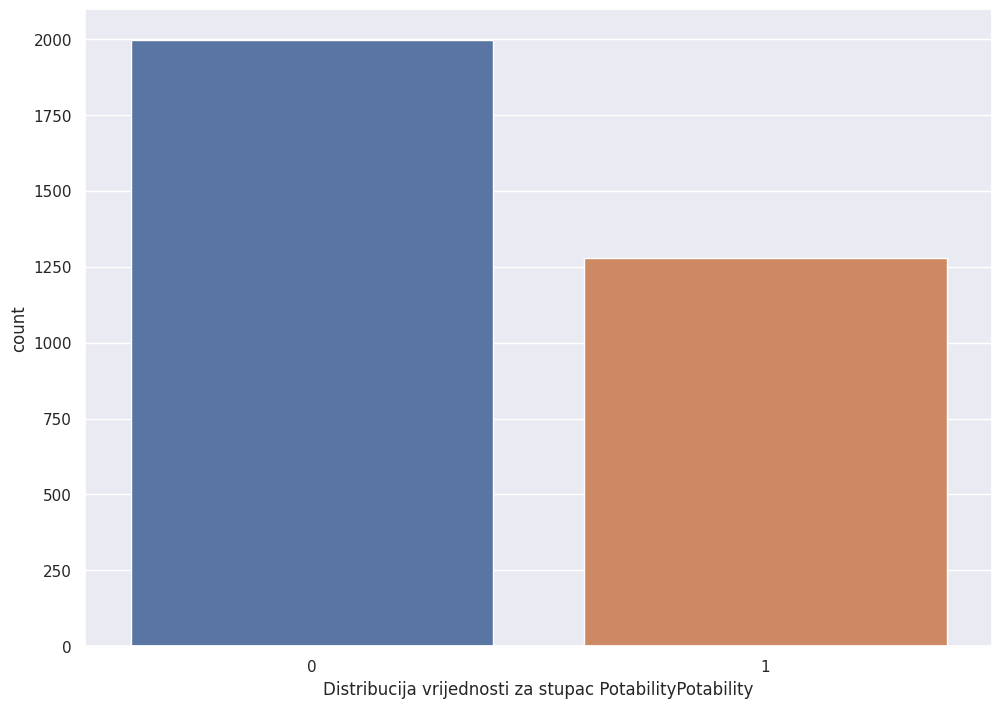

In [ ]:
count_plotted = sns.countplot(x = "Potability", data = dataframed)
count_plotted.set(xlabel = "Distribucija vrijednosti za stupac PotabilityPotability")

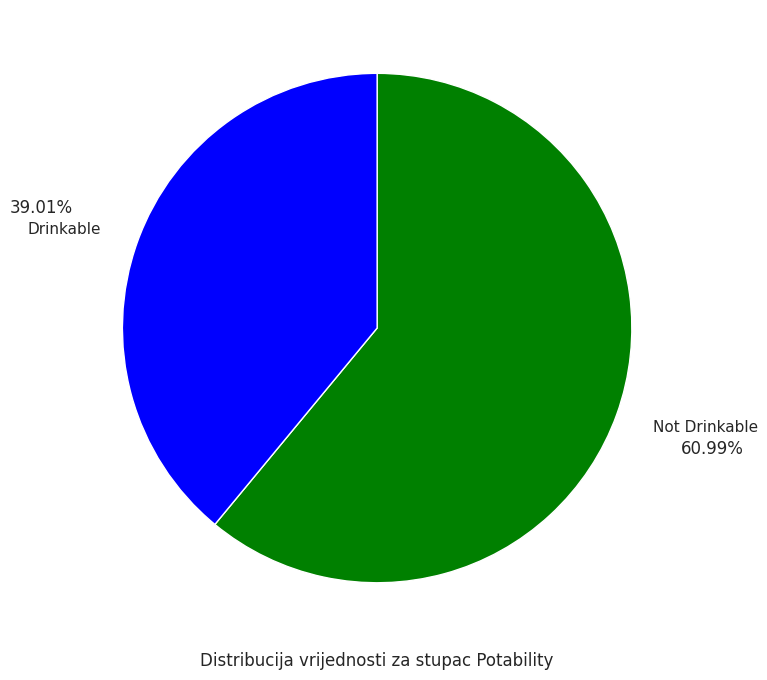

In [ ]:
plt.pie(dataframed['Potability'].value_counts(),labels=['Not Drinkable','Drinkable'],colors=['Green', 'Blue'],autopct='%1.2f%%',pctdistance=1.4,startangle=90,
        labeldistance=1.15,radius=1,counterclock=False,center=(0, 0),normalize=True,data=dataframed)
plt.xlabel("Distribucija vrijednosti za stupac Potability")
plt.show()

#X:

* PH VALUE
* HARDNESS
* SOLIDS
* CHLORAMINES
* SULFATE
* CONDUCTIVITY
* ORGANIC_CARBON
* TRIHALOMETHANES
* TURBIDITY

In [ ]:
X = dataframed.iloc[:, :-1]
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.112512,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


# Y:

* POTABILITY

In [ ]:
y = dataframed.iloc[:, -1:]
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


# Treniranje i testiranje
Algoritmi strojnog učenja:

* K-Nearest Neighbors
* Random Forest
* Logistic Regression
* Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

# Razdvajanje skupa podataka na skup za treniranje i skup za testiranje

Veličina skupa za testiranje

* 20%
* 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Shape of Data (20%)

In [ ]:
print('Shape of Data (20%)')
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (20%)
X_train shape :  (2620, 9)
y_train shape :  (2620, 1)
X_test shape :  (656, 9)
y_test shape :  (656, 1)


# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('K-Nearest Neighbors')
print('\n')
print('Training Model')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

K-Nearest Neighbors


Training Model
Accuracy Score : 0.7618
F1 Score : 0.7299
Precision Score : 0.8291
Recall Score : 0.7618


Testing Model
Accuracy Score : 0.5899
F1 Score : 0.5284
Precision Score : 0.5284
Recall Score : 0.5899


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test)

#Training
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('Random Forest')
print('\n')
print('Training Model')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Random Forest


Training Model
Accuracy Score : 1.0000
F1 Score : 1.0000
Precision Score : 1.0000
Recall Score : 1.0000


Testing Model
Accuracy Score : 0.8003
F1 Score : 0.7936
Precision Score : 0.8005
Recall Score : 0.8003


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train.values.ravel())
training_prediction = Logistic_Regression.predict(X_train)
testing_prediction = Logistic_Regression.predict(X_test)

# Training
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('Logistic Regression')
print('\n')

print('Training Model')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Logistic Regression


Training Model
Accuracy Score : 0.6061
F1 Score : 0.4846
Precision Score : 0.3944
Recall Score : 0.6280


Testing Model
Accuracy Score : 0.6280
F1 Score : 0.7936
Precision Score : 0.8005
Recall Score : 0.8003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Support Vector Machine

In [ ]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train.values.ravel())
training_prediction = SVM.predict(X_train)
testing_prediction = SVM.predict(X_test)

# Training
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('Support Vector Machine')
print('\n')

print('Training Model')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Support Vector Machine


Training Model
Accuracy Score : 0.6053
F1 Score : 0.4846
Precision Score : 0.3944
Recall Score : 0.6280


Testing Model
Accuracy Score : 0.6280
F1 Score : 0.7936
Precision Score : 0.8005
Recall Score : 0.8003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix

# Shape of Data (30%)

In [ ]:
print('Shape of Data (30%)')
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (30%)
X_train shape :  (2293, 9)
y_train shape :  (2293, 1)
X_test shape :  (983, 9)
y_test shape :  (983, 1)


#K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('K-Nearest Neighbors')
print('\n')
print('Training Model')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

K-Nearest Neighbors


Training Model
Accuracy Score : 0.7505
F1 Score : 0.7150
Precision Score : 0.8236
Recall Score : 0.7505


Testing Model
Accuracy Score : 0.6002
F1 Score : 0.5405
Precision Score : 0.5464
Recall Score : 0.6002


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test)

#Training
training_accuracy_RF = accuracy_score(y_train, training_prediction)
training_f1_RF = f1_score(y_train, training_prediction, average = 'weighted')
training_precision_RF = precision_score(y_train, training_prediction, average = 'weighted')
training_recall_RF = recall_score(y_train, training_prediction, average = 'weighted')

#Testing
testing_accuracy_RF = accuracy_score(y_test, testing_prediction)
testing_f1_RF = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision_RF = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall_RF = recall_score(y_test, testing_prediction, average = 'weighted')

print('Random Forest')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy_RF))
print('F1 Score : {:.4f}'.format(training_f1_RF))
print('Precision Score : {:.4f}'.format(training_precision_RF))
print('Recall Score : {:.4f}'.format(training_recall_RF))

print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy_RF))
print('F1 Score : {:.4f}'.format(testing_f1_RF))
print('Precision Score : {:.4f}'.format(testing_precision_RF))
print('Recall Score : {:.4f}'.format(testing_recall_RF))

Random Forest


Training Model Performance Check
Accuracy Score : 1.0000
F1 Score : 1.0000
Precision Score : 1.0000
Recall Score : 1.0000


Testing Model
Accuracy Score : 0.7945
F1 Score : 0.7862
Precision Score : 0.7961
Recall Score : 0.7945


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train.values.ravel())
training_prediction = Logistic_Regression.predict(X_train)
testing_prediction = Logistic_Regression.predict(X_test)

# Training
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('Logistic Regression')
print('\n')

print('Training Model')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Logistic Regression


Training Model
Accuracy Score : 0.6027
F1 Score : 0.4841
Precision Score : 0.3940
Recall Score : 0.6277


Testing Model
Accuracy Score : 0.6277
F1 Score : 0.5405
Precision Score : 0.5464
Recall Score : 0.6002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Support Vector Machine

In [ ]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train.values.ravel())
training_prediction = SVM.predict(X_train)
testing_prediction = SVM.predict(X_test)

# Training
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('Support Vector Machine')
print('\n')

print('Training Model')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Support Vector Machine


Training Model
Accuracy Score : 0.6023
F1 Score : 0.4841
Precision Score : 0.3940
Recall Score : 0.6277


Testing Model
Accuracy Score : 0.6277
F1 Score : 0.5405
Precision Score : 0.5464
Recall Score : 0.6002


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#HIPERPARAMETRI:

RANDOM FOREST

In [ ]:
rfc = RandomForestClassifier() # default parametri n_estimators = 100, max_features = 'sqrt'
rfc.fit(X_train, y_train)

<ipython-input-124-b70f2dc3f0be>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

Implementiran je model slučajne šume s defaultnim parametrima i treniran nad skupom podataka za treniranje.<br><br>

In [ ]:
from sklearn.model_selection import GridSearchCV


rfc2 = RandomForestClassifier()
parameters = {'n_estimators':[20, 50, 100, 200], 'max_features':[math.log(2), 1, 4, 10], 'max_depth': [3, 6, 9]} # definiramo mrežu hiperparametara
rfc_grid = GridSearchCV(rfc2, parameters, verbose=2) # cv default 5
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s
[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=50; total time=   0.2s
[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=0.6931471805599453, n_estimators=200; total time=   0.7s
[CV] END .......max_depth=3, max_features=1, n_estimators=20; total time=   0.0s
[CV] END .......max_depth=3, max_features=1, n_estimators=20; total time=   0.0s
[CV] END .......max_depth=3, max_features=1, n_estimators=20; total time=   0.0s
[CV] END .......max_depth=3, max_features=1, n_estimators=20; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END .......max_depth=3, max_features=1, n_estimators=20; total time=   0.0s
[CV] END .......max_depth=3, max_features=1, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=3, max_features=1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=3, max_features=1, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=3, max_features=1, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=3, max_features=1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=1, n_estimators=100; total time=   0.2s
[CV] END ......max_depth=3, max_features=1, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=1, n_estimators=100; total time=   0.2s
[CV] END ......max_depth=3, max_features=1, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=1, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=1, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=1, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=1, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=1, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=1, n_estimators=200; total time=   0.5s
[CV] END .......max_depth=3, max_features=4, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=3, max_features=4, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=3, max_features=4, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=3, max_features=4, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=3, max_features=4, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=3, max_features=4, n_estimators=50; total time=   0.2s
[CV] END .......max_depth=3, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=3, max_features=4, n_estimators=50; total time=   0.2s
[CV] END .......max_depth=3, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=3, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=4, n_estimators=200; total time=   0.5s
[CV] END ......max_depth=3, max_features=10, n_estimators=20; total time=   0.1s
[CV] END ......max_depth=3, max_features=10, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=10, n_estimators=20; total time=   0.1s
[CV] END ......max_depth=3, max_features=10, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=10, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=10, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=10, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=10, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=10, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=3, max_features=10, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=200; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=200; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=200; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=200; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=3, max_features=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s
[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s
[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=200; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=200; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=200; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=200; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=6, max_features=0.6931471805599453, n_estimators=200; total time=   1.0s
[CV] END .......max_depth=6, max_features=1, n_estimators=20; total time=   0.0s
[CV] END .......max_depth=6, max_features=1, n_estimators=20; total time=   0.0s
[CV] END .......max_depth=6, max_features=1, n_estimators=20; total time=   0.0s
[CV] END .......max_depth=6, max_features=1, n_estimators=20; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END .......max_depth=6, max_features=1, n_estimators=20; total time=   0.0s
[CV] END .......max_depth=6, max_features=1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=6, max_features=1, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=6, max_features=1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=6, max_features=1, n_estimators=50; total time=   0.2s
[CV] END .......max_depth=6, max_features=1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=200; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=1, n_estimators=200; total time=   0.4s
[CV] END .......max_depth=6, max_features=4, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=6, max_features=4, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=6, max_features=4, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=6, max_features=4, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=6, max_features=4, n_estimators=20; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=6, max_features=4, n_estimators=50; total time=   0.4s
[CV] END .......max_depth=6, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=6, max_features=4, n_estimators=50; total time=   0.2s
[CV] END .......max_depth=6, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=6, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=4, n_estimators=200; total time=   0.8s
[CV] END ......max_depth=6, max_features=10, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=10, n_estimators=20; total time=   0.1s
[CV] END ......max_depth=6, max_features=10, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=10, n_estimators=20; total time=   0.1s
[CV] END ......max_depth=6, max_features=10, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=10, n_estimators=50; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=10, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=10, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=10, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=6, max_features=10, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=200; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=200; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=200; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=200; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=6, max_features=10, n_estimators=200; total time=   1.9s
[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s
[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=20; total time=   0.2s
[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=20; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=100; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=100; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=100; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=200; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=200; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=200; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=200; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=9, max_features=0.6931471805599453, n_estimators=200; total time=   1.2s
[CV] END .......max_depth=9, max_features=1, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=9, max_features=1, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=9, max_features=1, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[CV] END .......max_depth=9, max_features=1, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=9, max_features=1, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=9, max_features=1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=9, max_features=1, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=9, max_features=1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=9, max_features=1, n_estimators=50; total time=   0.1s
[CV] END .......max_depth=9, max_features=1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=200; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=200; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=1, n_estimators=200; total time=   0.5s
[CV] END .......max_depth=9, max_features=4, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=9, max_features=4, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=9, max_features=4, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=9, max_features=4, n_estimators=20; total time=   0.1s
[CV] END .......max_depth=9, max_features=4, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=9, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=9, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=9, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=9, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .......max_depth=9, max_features=4, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=100; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=200; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=200; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=200; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=200; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=4, n_estimators=200; total time=   0.9s
[CV] END ......max_depth=9, max_features=10, n_estimators=20; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=10, n_estimators=20; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=10, n_estimators=20; total time=   0.2s
[CV] END ......max_depth=9, max_features=10, n_estimators=20; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=10, n_estimators=20; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=10, n_estimators=50; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=10, n_estimators=50; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=10, n_estimators=50; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=10, n_estimators=50; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END ......max_depth=9, max_features=10, n_estimators=50; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=200; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=200; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=200; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=200; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END .....max_depth=9, max_features=10, n_estimators=200; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': [0.6931471805599453, 1, 4, 10],
                         'n_estimators': [20, 50, 100, 200]},
             verbose=2)

GridSearchCV metoda je korištena za pronalaženje modela s najboljim hiperparametrima od ponuđenih kombinacija.

In [ ]:
print(f'Najbolja kombinacija hiperparametara: {rfc_grid.best_params_}')

Najbolja kombinacija hiperparametara: {'max_depth': 6, 'max_features': 4, 'n_estimators': 200}


In [ ]:
rfc_best = RandomForestClassifier(**rfc_grid.best_params_)
rfc_best.fit(X_train, y_train)

<ipython-input-127-b36bb5593ab5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_best.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, max_features=4, n_estimators=200)

In [ ]:
y_predict_best = rfc_best.predict(X_test)

#Testing
testing_accuracy = accuracy_score(y_test, y_predict_best)
testing_f1 = f1_score(y_test, y_predict_best, average = 'weighted')
testing_precision = precision_score(y_test, y_predict_best, average = 'weighted')
testing_recall = recall_score(y_test, y_predict_best, average = 'weighted')

print('Random Forest')
print('\n')
print('Testing Model')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

Random Forest


Testing Model
Accuracy Score : 0.7813
F1 Score : 0.7658
Precision Score : 0.7928
Recall Score : 0.7813


In [ ]:
print('Testing Model-Random Forest')
print('Accuracy Score : {:.4f}'.format(testing_accuracy_RF))
print('F1 Score : {:.4f}'.format(testing_f1_RF))
print('Precision Score : {:.4f}'.format(testing_precision_RF))
print('Recall Score : {:.4f}'.format(testing_recall_RF))

Testing Model-Random Forest
Accuracy Score : 0.7945
F1 Score : 0.7862
Precision Score : 0.7961
Recall Score : 0.7945


CROSS-VALIDACIJA

In [ ]:
def model_val(xtrain, xtest,ytrain, ytest):
    regression= {
        'RANDOM FOREST':RandomForestClassifier()
    }

    for name, model in regression.items():
        print('*'*60)
        print('Ime', name)

        score = cross_val_score(model, xtrain, ytrain, cv=10, n_jobs=-1)
        y_pred = cross_val_predict(model, xtrain, ytrain, cv=10, n_jobs=-1)

        print('-'*60)
        print('CROSS VAL SCORE')
        print(score)
        print()
        print('-'*60)
        print('SCORE:', score.mean())
        print('-'*60)
        print('MATRICA KONFUZIJE:')

        cm = confusion_matrix(ytrain, y_pred)
        cm_ = cm / cm.sum(axis=1).reshape(-1,1)

        fig,ax = plt.subplots(1,2,figsize=(10,4))
        sns.heatmap(cm, annot=True, fmt='.2f',ax=ax[0],cmap='RdPu')
        sns.heatmap(cm_, annot=True, fmt='.2f', ax=ax[1],cmap='RdPu')
        plt.tight_layout()
        plt.show()

************************************************************
Ime RANDOM FOREST
------------------------------------------------------------
CROSS VAL SCORE
[0.8        0.81304348 0.82173913 0.74672489 0.76855895 0.77729258
 0.77292576 0.78165939 0.79912664 0.77292576]

------------------------------------------------------------
SCORE: 0.7853996582494779
------------------------------------------------------------
MATRICA KONFUZIJE:


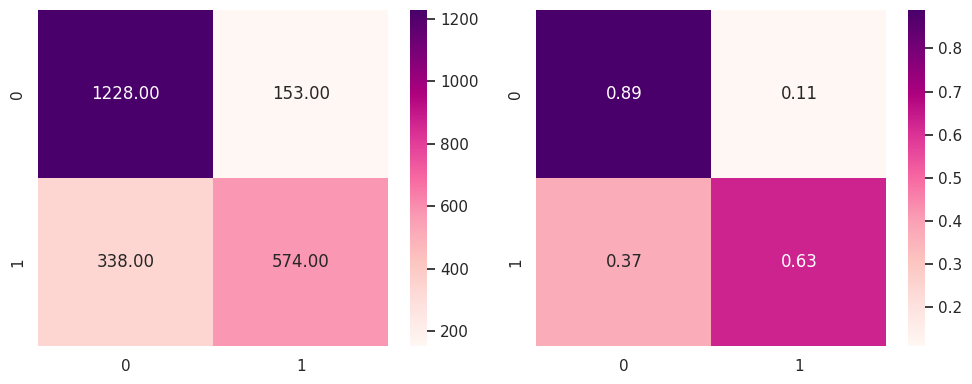

In [ ]:
model_val(X_train, X_test, y_train, y_test)

In [ ]:
def model_val(xtrain, xtest,ytrain, ytest):
    regression= {
        'RANDOM FOREST':RandomForestClassifier(**rfc_grid.best_params_)
    }

    for name, model in regression.items():
        print('*'*60)
        print('Ime', name)

        score = cross_val_score(model, xtrain, ytrain, cv=10, n_jobs=-1)
        y_pred = cross_val_predict(model, xtrain, ytrain, cv=10, n_jobs=-1)

        print('-'*60)
        print('CROSS VAL SCORE')
        print(score)
        print()
        print('-'*60)
        print('SCORE:', score.mean())
        print('-'*60)
        print('MATRICA KONFUZIJE:')

        cm = confusion_matrix(ytrain, y_pred)
        cm_ = cm / cm.sum(axis=1).reshape(-1,1)

        fig,ax = plt.subplots(1,2,figsize=(10,4))
        sns.heatmap(cm, annot=True, fmt='.2f',ax=ax[0],cmap='RdPu')
        sns.heatmap(cm_, annot=True, fmt='.2f', ax=ax[1],cmap='RdPu')
        plt.tight_layout()
        plt.show()

************************************************************
Ime RANDOM FOREST
------------------------------------------------------------
CROSS VAL SCORE
[0.82173913 0.79130435 0.81304348 0.75982533 0.76855895 0.7860262
 0.79475983 0.81222707 0.7860262  0.77292576]

------------------------------------------------------------
SCORE: 0.7906436301499904
------------------------------------------------------------
MATRICA KONFUZIJE:


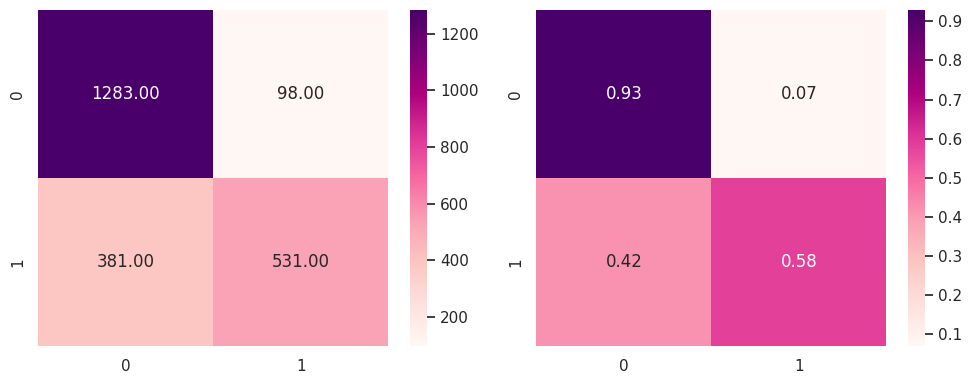

In [ ]:
model_val(X_train, X_test, y_train, y_test)

BOOSTER:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

rfc_best2 = RandomForestClassifier(**rfc_grid.best_params_)
ada_boost = AdaBoostClassifier(estimator=rfc_best2)
ada_boost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=6, max_features=4,
                                                    n_estimators=200))

In [ ]:
y_predict_ada_r = ada_boost.predict(X_test)
acc_score_ada_r = accuracy_score(y_test, y_predict_ada_r)
f1_score_ada_r = f1_score(y_test, y_predict_ada_r, average = 'weighted')
prec_ada_r = precision_score(y_test, y_predict_ada_r, average = 'weighted')
rec_ada_r = recall_score(y_test, y_predict_ada_r, average = 'weighted')

print('RFC + AdaBoost: \n')
print(f'Accuracy score: {acc_score_ada_r*100:.4f}%')
print(f'F1 score score: {f1_score_ada_r*100:.4f}%')
print(f'Precision score: {prec_ada_r*100:.4f}%')
print(f'Recall score: {rec_ada_r*100:.4f}%')


RFC + AdaBoost: 

Accuracy score: 79.1455%
F1 score score: 78.4257%
Precision score: 79.1093%
Recall score: 79.1455%
